<a href="https://colab.research.google.com/github/williambrunos/Data-Visualization/blob/main/Class%202/Class%202.2/Oficina/Oficina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.

Importe as bibliotecas pandas e matplotlib, usando a palavra mágica inline para exibir as visualizações no notebook; e carregue os dados, que estão disponibilizados neste link:dados, em um DataFrame. Assim, você pode carregar os dados pela URI ou salvar em sua máquina e carregá-los localmente;

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://d11s0xq1vqg039.cloudfront.net/videos_conteudo/visual/micro04/oficina/arquivos/dadosoficina04.txt')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [3]:
# Porcentagem ínfima de células com NaN
df.isna().sum().sum() * 100 / len(df.index)

1.9821665260874803

In [5]:
# Retirando os valores NaN do data frame
df = df.dropna() 

# 2.

Crie uma visualização que mostre a proporção de vendas global entre gêneros de jogos da empresa Nintendo;

In [13]:
# Selecionando apenas as células com jogos da nintendo
df_with_only_nintendo_games = df[df['Publisher'] == 'Nintendo']
df_with_only_nintendo_games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16269,16272,Slide Adventure: Mag Kid,DS,2007.0,Action,Nintendo,0.00,0.00,0.01,0.00,0.01
16357,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015.0,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01
16456,16459,Art Academy: Home Studio,WiiU,2015.0,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01
16473,16476,Captain Rainbow,Wii,2008.0,Adventure,Nintendo,0.00,0.00,0.01,0.00,0.01


In [16]:
# Agrupando os jogos da nintendo por categorias (Gêneros) e calculando a soma dos indicadores
nintendo_genres = df_with_only_nintendo_games.groupby('Genre').sum().sort_values(by = 'Global_Sales', ascending = False)
nintendo_genres

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Platform,243869,222146.0,219.46,84.90,102.36,19.43,426.18
Role-Playing,368596,210720.0,105.63,63.92,101.95,13.03,284.57
Sports,186935,110069.0,98.77,66.18,35.87,17.18,218.01
Misc,523309,200625.0,61.98,51.62,55.25,11.78,180.67
Racing,82066,73967.0,73.55,39.75,29.22,8.81,151.30
Action,348132,156516.0,63.49,29.02,29.16,6.48,128.10
Puzzle,327830,148134.0,55.74,26.42,37.09,5.53,124.88
Simulation,97002,56156.0,29.70,26.05,23.65,5.86,85.25
Shooter,68681,48030.0,51.39,9.85,6.03,2.39,69.69


In [47]:
plt.style.use('seaborn-darkgrid')

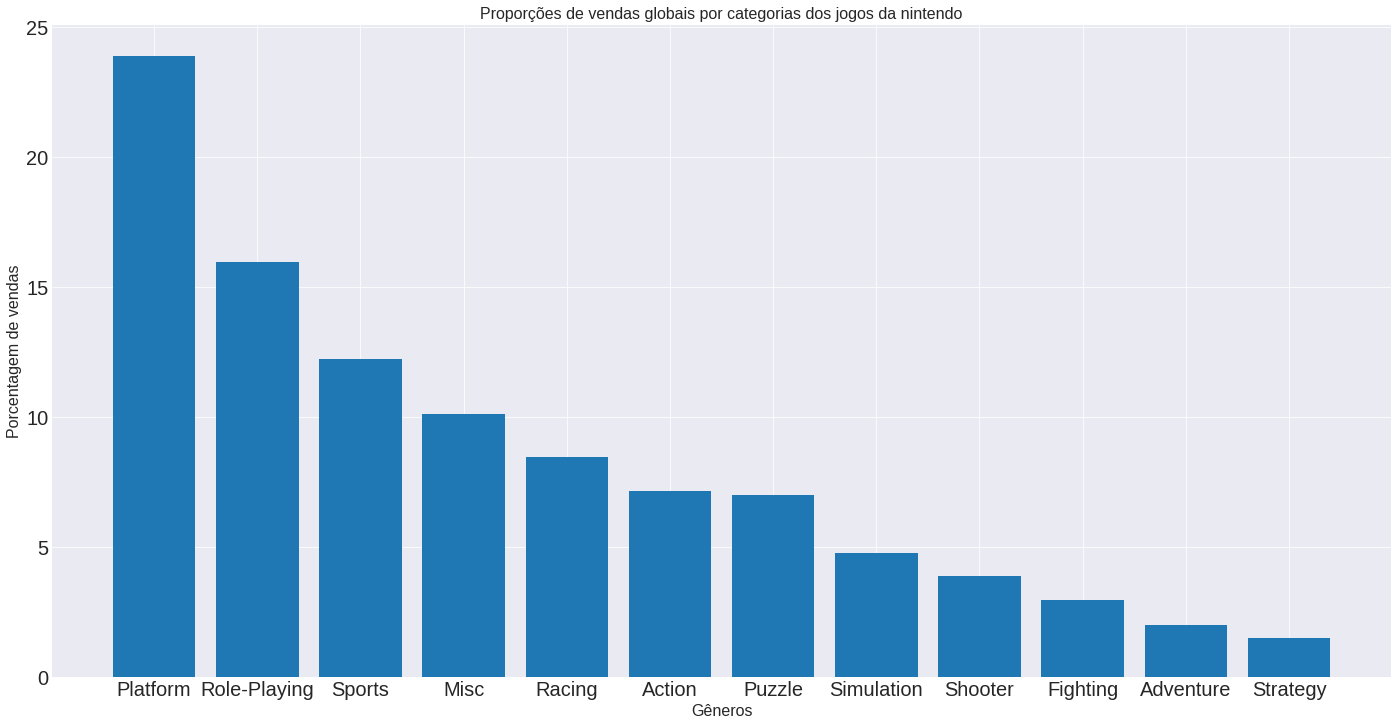

In [50]:
# Calculando as porcentagens das vendas globais de cada gênero de jogos vendidos pela Nintendo
percentages = nintendo_genres['Global_Sales'] * 100 / nintendo_genres['Global_Sales'].sum()
categories = nintendo_genres.index 

plt.figure(figsize=(24, 12))
plt.title('Proporções de vendas globais por categorias dos jogos da nintendo', fontsize=16)
plt.xlabel('Gêneros', fontsize = 16)
plt.ylabel('Porcentagem de vendas', fontsize = 16)
plt.bar(categories, percentages)

plt.show()

# 3.

Crie uma visualização que mostre a proporção de quantidade de jogos por plataforma a partir do ano de 2015.

In [51]:
df_older_2015 = df[df['Year'] >= 2015]
df_older_2015.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
92,93,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
101,102,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,Activision,4.52,2.09,0.01,0.67,7.30
109,110,Fallout 4,PS4,2015.0,Role-Playing,Bethesda Softworks,2.47,3.15,0.24,1.10,6.96


In [54]:
games_older_than_2015 = df_older_2015.groupby('Platform').count().sort_values(by='Name', ascending = False)
games_older_than_2015

,Rank,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,,,,,,
PS4,245,245,245,245,245,245,245,245,245,245
PSV,173,173,173,173,173,173,173,173,173,173
XOne,133,133,133,133,133,133,133,133,133,133
3DS,121,121,121,121,121,121,121,121,121,121
PS3,106,106,106,106,106,106,106,106,106,106
PC,88,88,88,88,88,88,88,88,88,88
X360,48,48,48,48,48,48,48,48,48,48
WiiU,38,38,38,38,38,38,38,38,38,38
Wii,4,4,4,4,4,4,4,4,4,4


In [55]:
games_older_than_2015['Name'] * 100 / games_older_than_2015['Name'].sum()

Platform
PS4     25.520833
PSV     18.020833
XOne    13.854167
3DS     12.604167
PS3     11.041667
PC       9.166667
X360     5.000000
WiiU     3.958333
Wii      0.416667
PSP      0.312500
DS       0.104167
Name: Name, dtype: float64

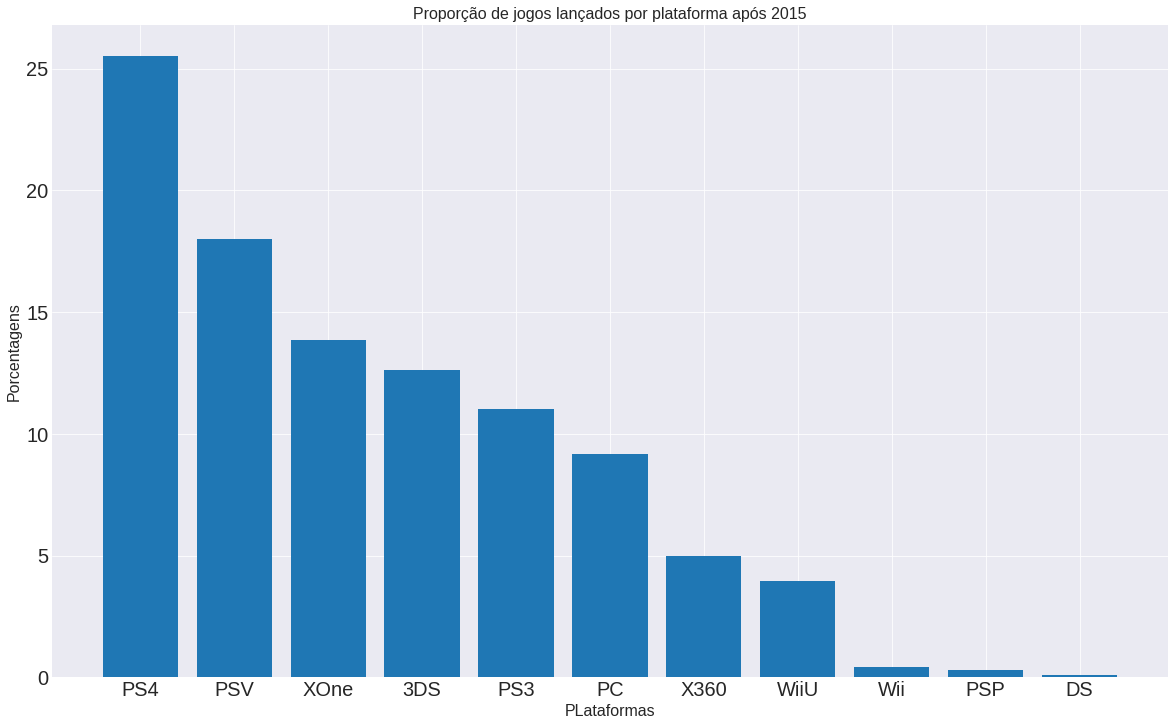

In [58]:
# Podemos obter a quantidade de jogos em cada plataforma no data frame acima analisando o método count aplicado
# ao nome dos jogos (quantidade de nomes dos jogos é igual à quantidade de jogos em cada plataforma)
percentages = games_older_than_2015['Name'] * 100 / games_older_than_2015['Name'].sum()
categories = games_older_than_2015.index

plt.figure(figsize=(20, 12))
plt.title('Proporção de jogos lançados por plataforma após 2015', fontsize=16)
plt.xlabel('PLataformas', fontsize=16)
plt.ylabel('Porcentagens', fontsize=16)
plt.bar(categories, percentages)
plt.show()